<a href="https://colab.research.google.com/github/MissTife/Exploratory-Data-Analysis-in-SQL/blob/main/Market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend

1. import Libraries.
2. insert the data and preview the dataset.
3. Explore the data and Preprocess it for analysis.
4. Analyzing the relationship between items that are frequently bought together using Apriori Algorithm.


In [2]:
from mlxtend.frequent_patterns import apriori  #import libraries
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd


In [3]:
df=pd.read_csv("/content/Market Basket Analysis - Groceries_dataset.csv")
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df['itemDescription'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer


*show the occurence of each item that was  ordered*

In [6]:
item_count= df['itemDescription'].value_counts().reset_index(name='occurences')
item_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,occurences
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
item_count['occurences'].plot(kind='hist', bins=20, title='occurences')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
item_count['occurences'].plot(kind='line', figsize=(8, 4), title='occurences')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*Get the items that appear in a single transaction and group them together.items that have a single receipt.*

In [7]:
Grouped_data = df.groupby(['Member_number' , 'Date'])['itemDescription'].apply(list).reset_index(name='items_in_transaction')
Grouped_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,items_in_transaction
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


*create a column that shows the quantity of each item in a single transaction*

In [8]:
Quantity_of_item_in_transaction=(
    df.groupby(['Member_number' , 'Date','itemDescription'])
    .size().reset_index(name='Quantity_of_item_in_transaction')
)
Quantity_of_item_in_transaction_pivot =Quantity_of_item_in_transaction.pivot_table(index=['Member_number' , 'Date'],
                                                                                   columns='itemDescription',
                                                                                   values='Quantity_of_item_in_transaction',
                                                                                   fill_value=0)
Quantity_of_item_in_transaction_pivot= Quantity_of_item_in_transaction_pivot.reset_index()
Quantity_of_item_in_transaction_pivot.columns.name= None
Quantity_of_item_in_transaction_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1000,24-06-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000,24-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,25-11-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,27-05-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999,24-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14959,4999,26-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,5000,09-03-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,5000,10-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Just before the analysis, encode the quantity to indicate the presence or absence of items in each transaction.*

In [9]:
def quantity_encoder(item):
    if item > 0 :
        return 1
    else:
        return 0
basket= Quantity_of_item_in_transaction_pivot.iloc[:,2::].applymap(quantity_encoder)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
frequent_items= apriori(basket,min_support=0.001, use_colnames=True)
rules=association_rules(frequent_items,metric="lift")
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


To get the most popular product combination.

In [18]:
Top=rules.sort_values(["support","confidence","lift"],axis= 0, ascending =False).head(10)
Top

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


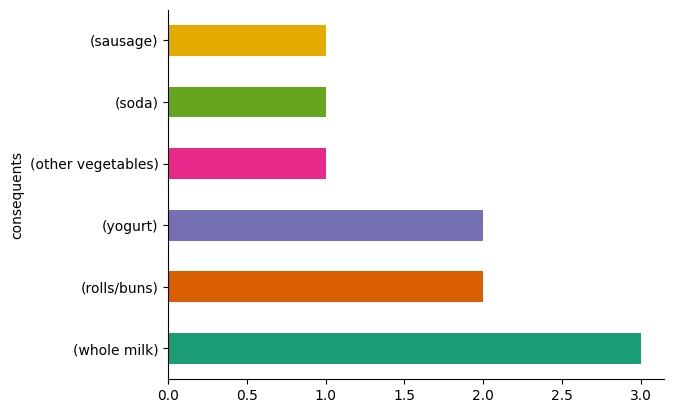

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


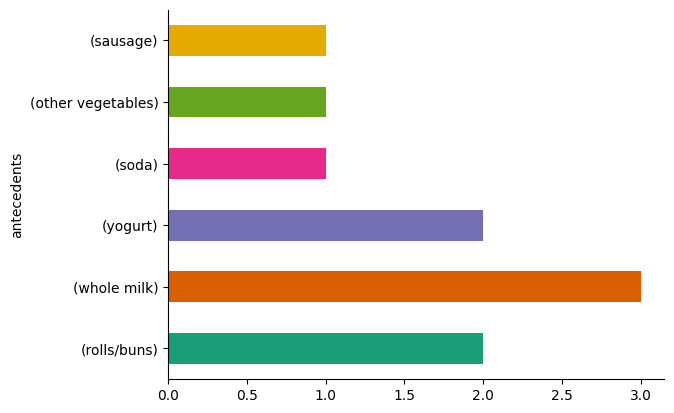

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('antecedents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


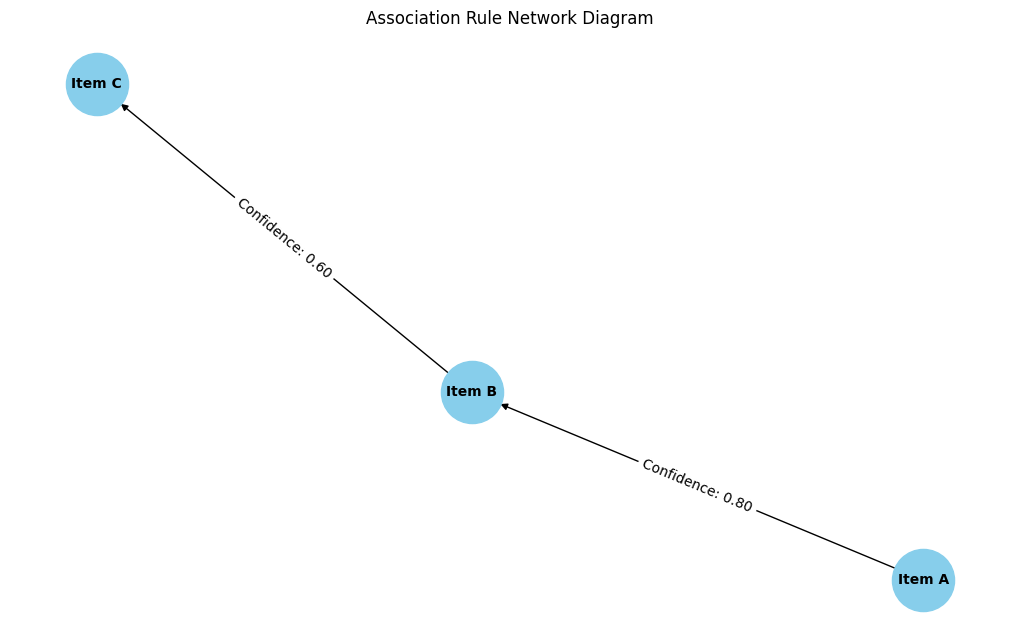

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


rules = pd.DataFrame({
    'Antecedent': ['Item A', 'Item B'],
    'Consequent': ['Item B', 'Item C'],
    'Support': [0.05, 0.03],
    'Confidence': [0.8, 0.6],
    'Lift': [1.2, 1.1],
    'Leverage': [0.01, 0.005],
    'Conviction': [1.25, 1.1],
    'Zhongshan': [1.0, 0.9]
})


G = nx.DiGraph()


for index, row in rules.iterrows():
    antecedent = str(row['Antecedent'])  # Convert to string
    consequent = str(row['Consequent'])  # Convert to string

    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, label=f"Confidence: {row['Confidence']:.2f}")


pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Association Rule Network Diagram')
plt.show()


The minimum support can be adjusted to control the threshold of the frequent items bought together.
**Result**
1. Antecedent and Consequent: This are the items that are usually bought together.
2. Support:This shows the proportion of transactions that contains the itemset.it indicates how frequently the items appear in the data.
3. Confidence measures the reliability of the rule.it is the probability of finding the consquent in a transaction giveen that the antecedent is present.
4. Lift: Lift measures the likelihood of the consequent given the antecedent.A liftt greater than 1 indicates a positive association.
5. Leverage:measures the differencebetween the observed frequency of the antecedent and the consequent appearing together and the frequency that would be expeccted if they individual.
6. Conviction:This is the ratio of the expected frequency of the occurence of antecedent if is independent of the consequent ,to the observed frequency of
the antecedent occuring without the consequent.
7. Zhang's metric(Zhongshan): it combines confidence and suport to evaluate the strength of association rules.The higher the Zhang's metric, the higher the association.